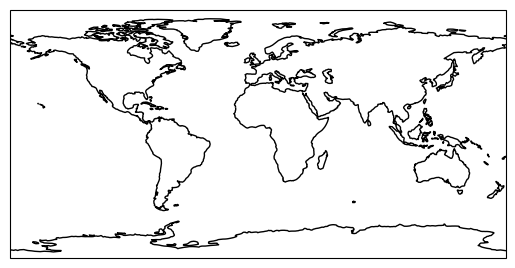

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

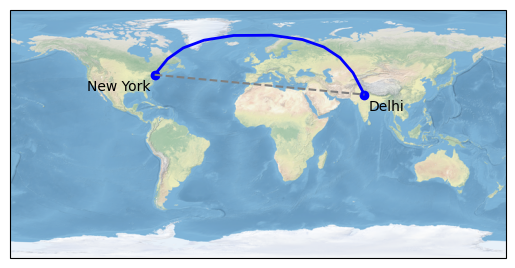

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

In [3]:
import pandas as pd

data = {
    'city': ['CityA', 'CityB', 'CityC'],
    'latitude': [34.05, 36.16, 40.71],
    'longitude': [-118.24, -115.15, -74.01]
}
df = pd.DataFrame(data)

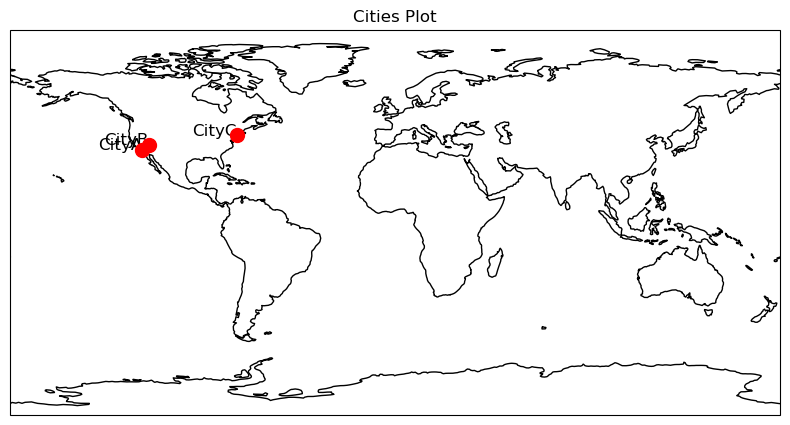

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure with a Cartopy projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add coastlines and borders for better context
ax.coastlines()

# Plot the data
ax.scatter(df['longitude'], df['latitude'], color='red', s=100, zorder=5)

# Annotate the points
for i, row in df.iterrows():
    ax.text(row['longitude'], row['latitude'], row['city'], fontsize=12, ha='right')

# Set titles and show the plot
ax.set_title('Cities Plot')
plt.show()

Plot Colorado with tx and Rx

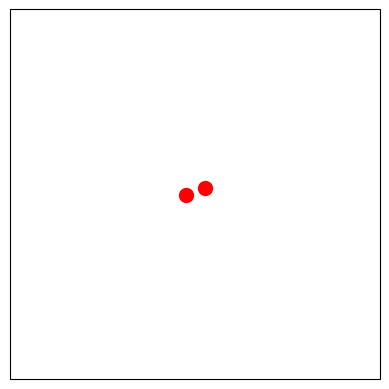

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()

tx_lon, tx_lat=-105.235,39.965
rx_lon,rx_lat=-104.73,40.18

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax.scatter(tx_lon, tx_lat, color='red', s=100, zorder=5)
ax.scatter(rx_lon, rx_lat, color='red', s=100, zorder=5)

ax.set_extent([-100, -110, 35, 45], crs=ccrs.PlateCarree())
#ax.set_extent([35,45,-100,-110])

#ax.set_extent([30, 70, -15, 10], crs=ccrs.PlateCarree())

plt.show()

/var/folders/zv/xvrfn2s16sv2y7nyhzw377y40000gn/T/ipykernel_8509/3105264425.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colorado = colorado[colorado.geometry.bounds.apply(lambda x: x[1] <= 41.003 and x[3] >= 37.0, axis=1)]


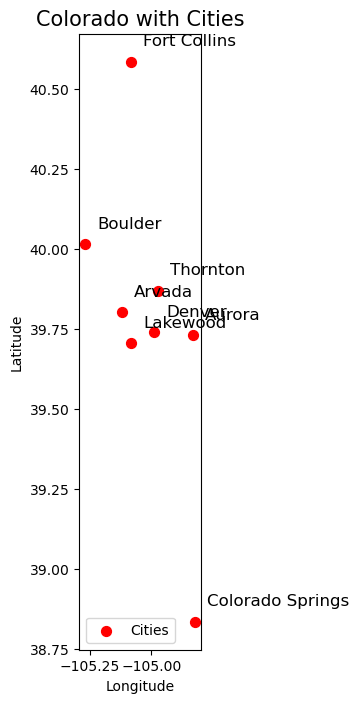

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# List of cities and their coordinates (Latitude, Longitude)
cities = {
    "Denver": (-104.9903, 39.7392),
    "Colorado Springs": (-104.8214, 38.8339),
    "Aurora": (-104.8319, 39.7294),
    "Fort Collins": (-105.082, 40.5853),
    "Boulder": (-105.2705, 40.015),
    "Lakewood": (-105.0814, 39.7047),
    "Thornton": (-104.9719, 39.8687),
    "Arvada": (-105.1187, 39.8028),
}

# Load Colorado shapefile (state boundaries)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
colorado = world[world.name == "United States of America"]

# Filter Colorado only
colorado = colorado[colorado.geometry.bounds.apply(lambda x: x[1] <= 41.003 and x[3] >= 37.0, axis=1)]

# Create GeoDataFrame for cities
city_coords = [Point(lon, lat) for lon, lat in cities.values()]
city_names = list(cities.keys())
cities_gdf = gpd.GeoDataFrame(geometry=city_coords, crs="EPSG:4326")
cities_gdf['city'] = city_names

# Plotting Colorado and the cities
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the Colorado state map
#colorado.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the cities on the map
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=50, label="Cities")

# Add labels for the cities
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf['city']):
    ax.text(x + 0.05, y + 0.05, label, fontsize=12, ha='left', color='black')

# Title and labels
plt.title("Colorado with Cities", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.legend()
plt.show()

In [10]:
#from __future__ import division
import numpy as np 
import matplotlib as mpl        
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()
extent = [-104, -105.5, 39.3, 40.3]

tx_lon, tx_lat=-105.235,39.965
rx_lon,rx_lat= -104.73,40.18

#fig = plt.figure(figsize=(7, 4.9), layout='constrained')
plt.figure(dpi=800)
plt.subplot(1, 1, 2)
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 9)

ax.text(-105.235,39.85, 'TX',transform=ccrs.PlateCarree())
ax.text(-104.7614,39.43, 'RX',transform=ccrs.PlateCarree())

ax.plot(tx_lon, tx_lat,'ro', color='red', transform=ccrs.PlateCarree()) #red
ax.plot(rx_lon, rx_lat, 'ro', color='blue',transform=ccrs.PlateCarree())

plt.subplot(1, 1, 2)

request = cimgt.OSM()
extent = [-104, -105.5, 39.3, 40.3]

tx_lon, tx_lat=-105.235,39.965
rx_lon,rx_lat=-104.75,39.5186

#fig = plt.figure(figsize=(7, 4.9), layout='constrained')
plt.figure(dpi=800)
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 9)

ax.text(-105.235,39.85, 'TX',transform=ccrs.PlateCarree())
ax.text(-104.7614,39.43, 'RX',transform=ccrs.PlateCarree())

ax.plot(tx_lon, tx_lat,'ro', color='red', transform=ccrs.PlateCarree()) #red
ax.plot(rx_lon, rx_lat, 'ro', color='blue',transform=ccrs.PlateCarree())

plt.show()

ValueError: num must be an integer with 1 <= num <= 1, not 2

<Figure size 5120x3840 with 0 Axes>

/var/folders/zv/xvrfn2s16sv2y7nyhzw377y40000gn/T/ipykernel_2399/3962977568.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(txn_lon, txn_lat,'ro', color='red', transform=ccrs.PlateCarree()) #red
/var/folders/zv/xvrfn2s16sv2y7nyhzw377y40000gn/T/ipykernel_2399/3962977568.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(rxo_lon, rxo_lat, 'ro', color='red',transform=ccrs.PlateCarree())
/var/folders/zv/xvrfn2s16sv2y7nyhzw377y40000gn/T/ipykernel_2399/3962977568.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(rx_lon, rx_lat, 'ro', color='blue',transform=ccrs.PlateCarree())


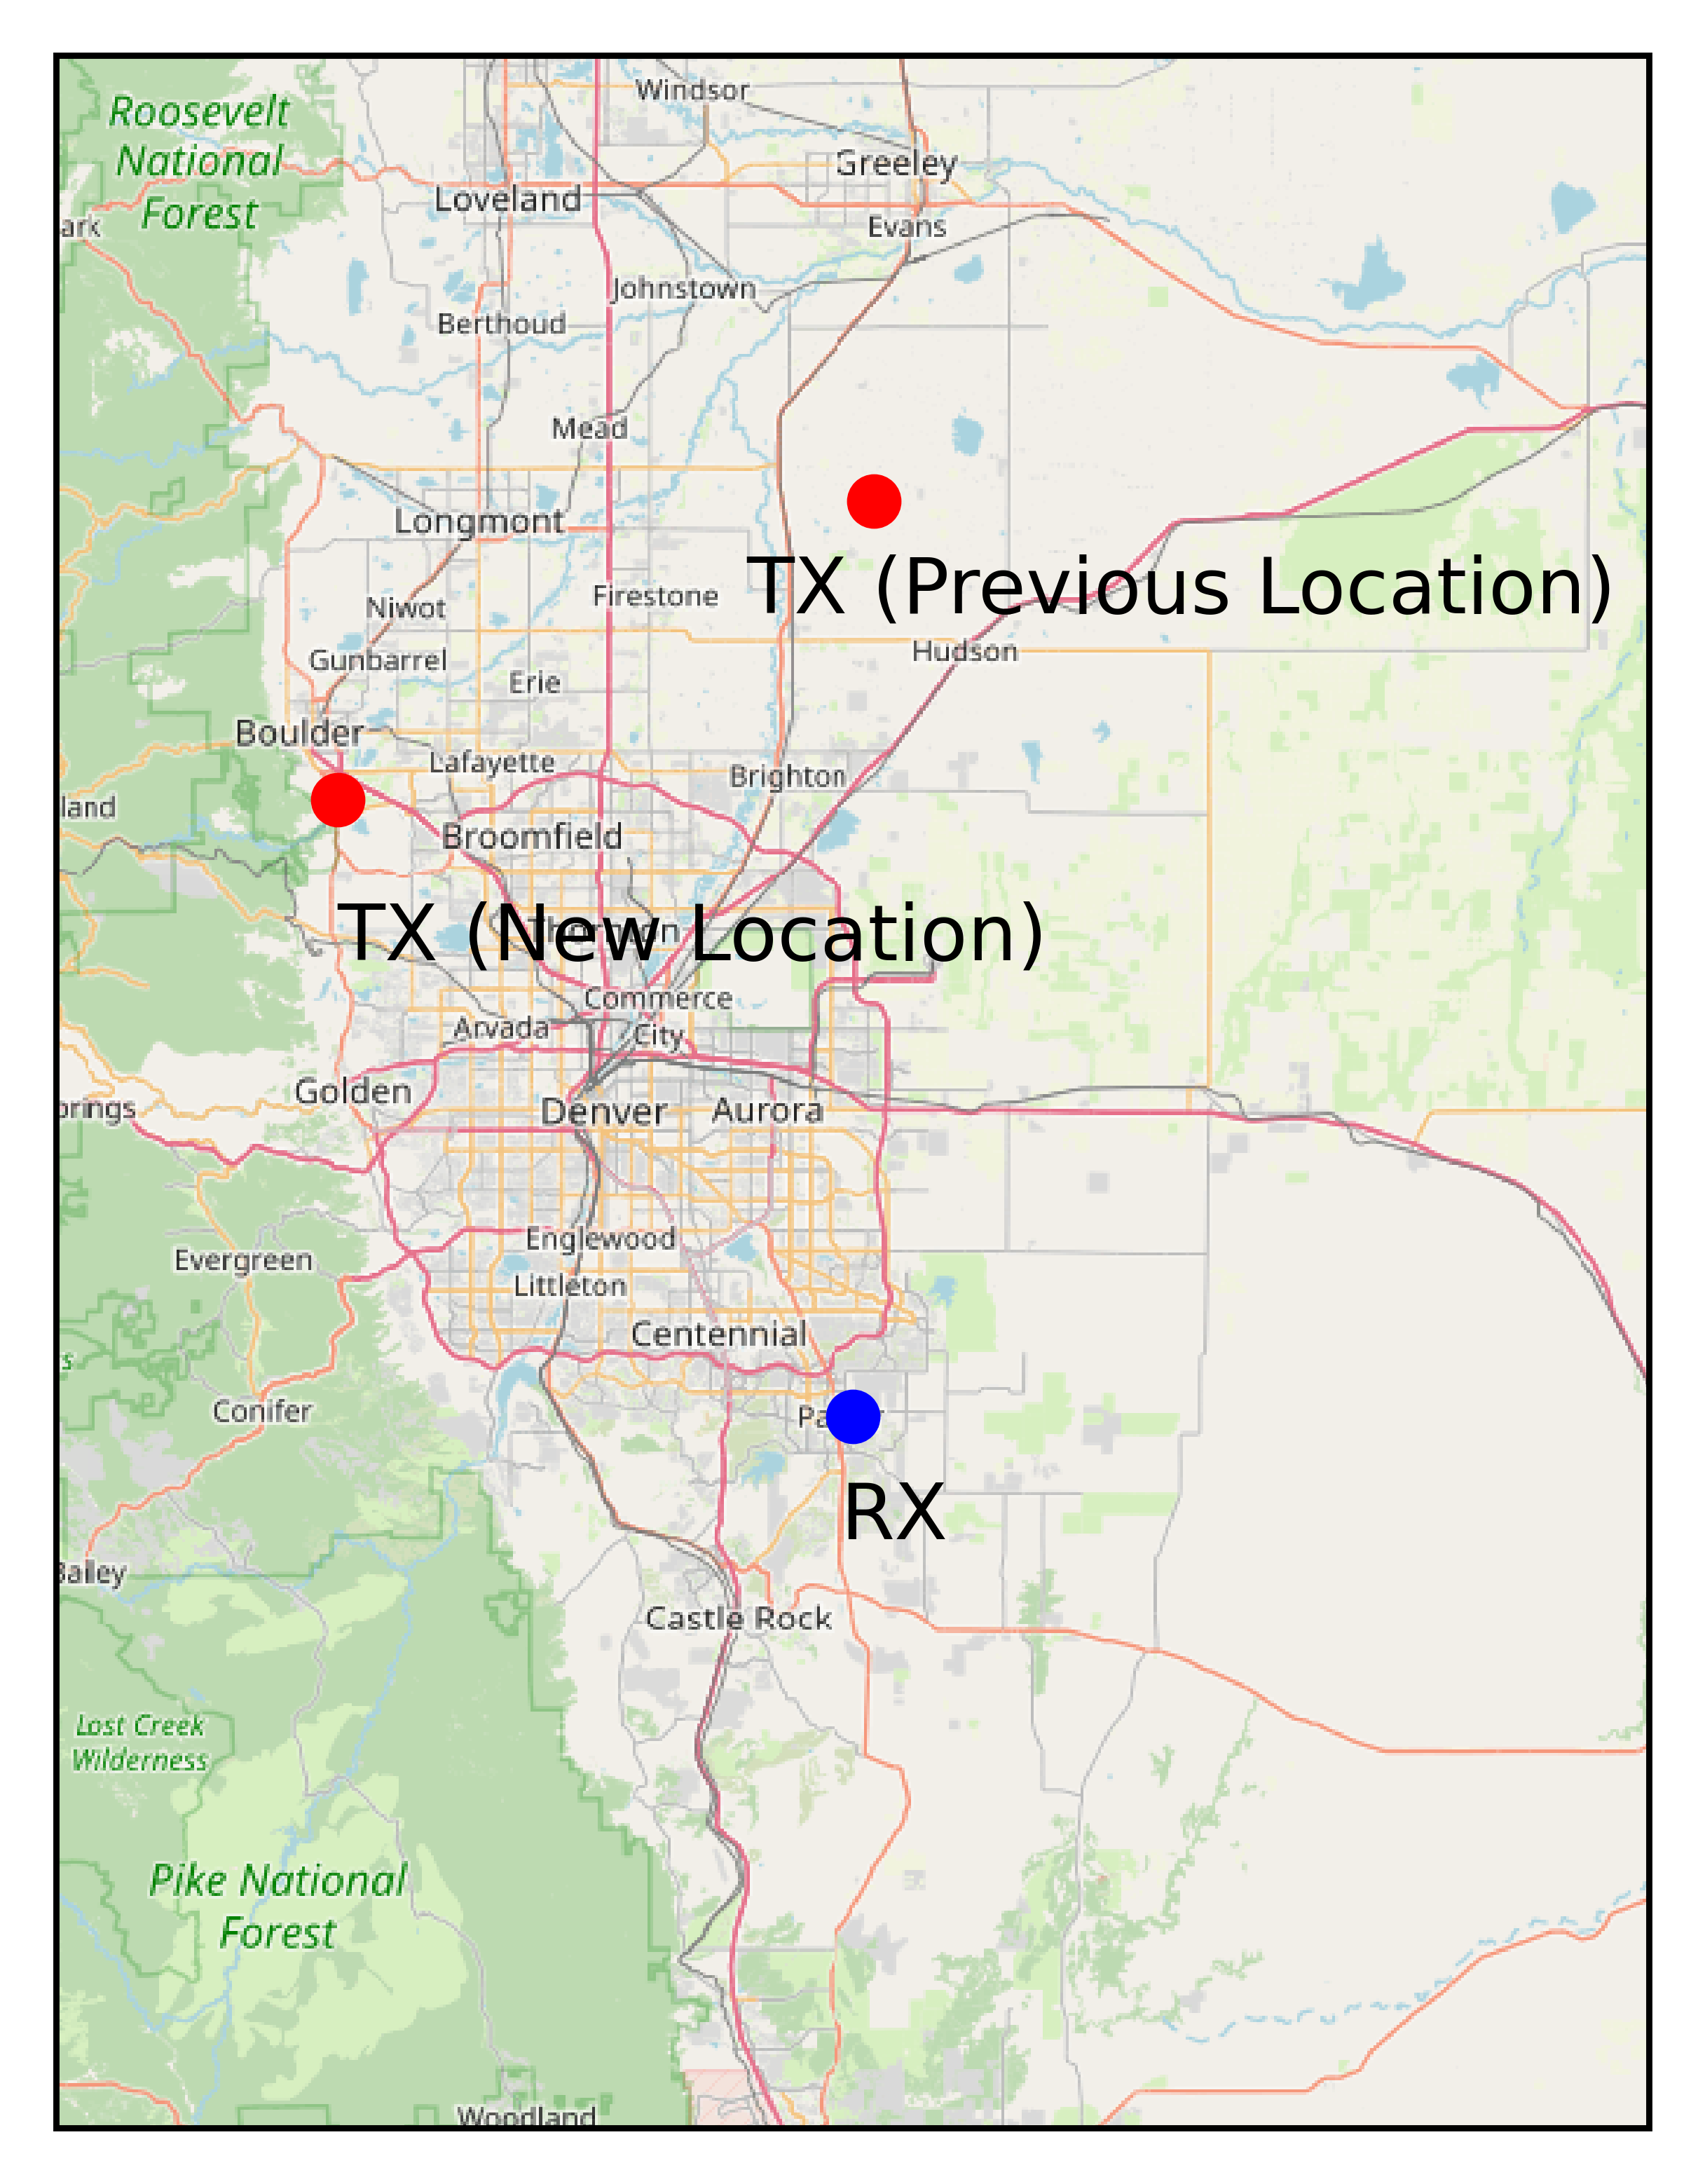

In [6]:
#from __future__ import division
import numpy as np 
import matplotlib as mpl        
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()
extent = [-104, -105.5, 39, 40.5]

txn_lon, txn_lat=-105.235,39.965 #New TX
txo_lon,txo_lat= -104.73,40.18 #Old TX
rx_lon,rx_lat= -104.75,39.5186
#rx_lon,rx_lat= -104.73,40.18

#fig = plt.figure(figsize=(7, 4.9), layout='constrained')
plt.figure(dpi=800)
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 9)

ax.text(-105.235,39.85, 'TX (New Location)',transform=ccrs.PlateCarree())
ax.text(-104.7614,39.43, 'RX',transform=ccrs.PlateCarree())
ax.text(-104.85,40.1, 'TX (Previous Location)' ,transform=ccrs.PlateCarree())

ax.plot(txn_lon, txn_lat,'ro', color='red', transform=ccrs.PlateCarree()) #red
ax.plot(rxo_lon, rxo_lat, 'ro', color='red',transform=ccrs.PlateCarree())
ax.plot(rx_lon, rx_lat, 'ro', color='blue',transform=ccrs.PlateCarree())

plt.show()